# Merging CSV File Attempt

In [27]:
import json
import pandas as pd
import numpy as np
import os
import glob
import re

from sqlalchemy import create_engine
import psycopg2

# from config import db_password
from config import db_password
from config import db_username
from config import db_url
from config import db_port
from config import db_name

import time

In [6]:
# Path to your data
path = "DATA"

# Get all .csv files at your path
allFiles = glob.glob(path + "/*.csv")

# Read in the data from files and safe to dictionary
dataStorage = {}
for filename in allFiles:
    name = os.path.basename(filename).split(".")[0]
    dataStorage[name] = pd.read_csv(filename)

In [7]:
# merge
out = pd.concat(dataStorage.values(), ignore_index=True)

In [8]:
out.count()

timestamp          1944
trip_id            1944
depart_airport     1944
return_airport     1944
depart_date        1944
return_date        1944
total_cost         1944
depart_datetime    1944
depart_duration    1944
depart_stops       1944
return_datetime    1944
return_duration    1944
return_stops       1944
dtype: int64

In [9]:
out.dtypes

timestamp           object
trip_id             object
depart_airport      object
return_airport      object
depart_date         object
return_date         object
total_cost         float64
depart_datetime     object
depart_duration      int64
depart_stops         int64
return_datetime     object
return_duration      int64
return_stops         int64
dtype: object

In [10]:
out = out.rename(columns={"timestamp":"time_stamp"})

In [11]:
out["total_cost"]=out["total_cost"].astype(int)
out["time_stamp"] = pd.to_datetime(out["time_stamp"])

In [12]:
out.dtypes

time_stamp         datetime64[ns]
trip_id                    object
depart_airport             object
return_airport             object
depart_date                object
return_date                object
total_cost                  int32
depart_datetime            object
depart_duration             int64
depart_stops                int64
return_datetime            object
return_duration             int64
return_stops                int64
dtype: object

In [28]:
path2 = "DATA/mergedtest.csv"

In [29]:
out.to_csv(path2,index=False)

In [16]:
#create the connection to the PostgreSQL database, then add the movies_df DataFrame to a SQL database.
db_string = f"postgresql://{db_username}:{db_password}@{db_url}:{db_port}/{db_name}"
engine = create_engine(db_string)
out.to_sql(name='test', con=engine, if_exists='append',index=False)

KeyError: 0

In [15]:
out.to_sql(name='test', con=engine, if_exists='append',index=False)

IntegrityError: (psycopg2.errors.UniqueViolation) duplicate key value violates unique constraint "test_pkey"
DETAIL:  Key (time_stamp)=(2022-06-23 04:40:11) already exists.

[SQL: INSERT INTO test (time_stamp, trip_id, depart_airport, return_airport, depart_date, return_date, total_cost, depart_datetime, depart_duration, depart_stops, return_datetime, return_duration, return_stops) VALUES (%(time_stamp)s, %(trip_id)s, %(depart_airport)s, %(return_airport)s, %(depart_date)s, %(return_date)s, %(total_cost)s, %(depart_datetime)s, %(depart_duration)s, %(depart_stops)s, %(return_datetime)s, %(return_duration)s, %(return_stops)s)]
[parameters: ({'time_stamp': datetime.datetime(2022, 6, 23, 4, 40, 11), 'trip_id': 'SNA-PHX-06/23/2022-06/27/2022', 'depart_airport': 'SNA', 'return_airport': 'PHX', 'depart_date': '06/23/2022', 'return_date': '06/27/2022', 'total_cost': 353, 'depart_datetime': '06-23-2022 12:56:00', 'depart_duration': 78, 'depart_stops': 0, 'return_datetime': '06-27-2022 10:13:00', 'return_duration': 88, 'return_stops': 0}, {'time_stamp': datetime.datetime(2022, 6, 23, 4, 41, 2), 'trip_id': 'SNA-PHX-06/30/2022-07/04/2022', 'depart_airport': 'SNA', 'return_airport': 'PHX', 'depart_date': '06/30/2022', 'return_date': '07/04/2022', 'total_cost': 269, 'depart_datetime': '06-30-2022 12:56:00', 'depart_duration': 78, 'depart_stops': 0, 'return_datetime': '07-04-2022 10:18:00', 'return_duration': 88, 'return_stops': 0}, {'time_stamp': datetime.datetime(2022, 6, 23, 4, 41, 52), 'trip_id': 'SNA-PHX-07/07/2022-07/11/2022', 'depart_airport': 'SNA', 'return_airport': 'PHX', 'depart_date': '07/07/2022', 'return_date': '07/11/2022', 'total_cost': 239, 'depart_datetime': '07-07-2022 13:11:00', 'depart_duration': 79, 'depart_stops': 0, 'return_datetime': '07-11-2022 10:18:00', 'return_duration': 88, 'return_stops': 0}, {'time_stamp': datetime.datetime(2022, 6, 23, 4, 42, 43), 'trip_id': 'SNA-PHX-07/14/2022-07/18/2022', 'depart_airport': 'SNA', 'return_airport': 'PHX', 'depart_date': '07/14/2022', 'return_date': '07/18/2022', 'total_cost': 300, 'depart_datetime': '07-14-2022 13:11:00', 'depart_duration': 79, 'depart_stops': 0, 'return_datetime': '07-18-2022 14:00:00', 'return_duration': 79, 'return_stops': 0}, {'time_stamp': datetime.datetime(2022, 6, 23, 4, 43, 34), 'trip_id': 'SNA-PHX-07/21/2022-07/25/2022', 'depart_airport': 'SNA', 'return_airport': 'PHX', 'depart_date': '07/21/2022', 'return_date': '07/25/2022', 'total_cost': 300, 'depart_datetime': '07-21-2022 16:44:00', 'depart_duration': 84, 'depart_stops': 0, 'return_datetime': '07-25-2022 10:18:00', 'return_duration': 88, 'return_stops': 0}, {'time_stamp': datetime.datetime(2022, 6, 23, 4, 44, 30), 'trip_id': 'SNA-ORD-06/23/2022-06/27/2022', 'depart_airport': 'SNA', 'return_airport': 'ORD', 'depart_date': '06/23/2022', 'return_date': '06/27/2022', 'total_cost': 2939, 'depart_datetime': '06-23-2022 16:44:00', 'depart_duration': 636, 'depart_stops': 1, 'return_datetime': '06-27-2022 09:55:00', 'return_duration': 251, 'return_stops': 0}, {'time_stamp': datetime.datetime(2022, 6, 23, 4, 45, 25), 'trip_id': 'SNA-ORD-06/30/2022-07/04/2022', 'depart_airport': 'SNA', 'return_airport': 'ORD', 'depart_date': '06/30/2022', 'return_date': '07/04/2022', 'total_cost': 582, 'depart_datetime': '06-30-2022 16:44:00', 'depart_duration': 330, 'depart_stops': 1, 'return_datetime': '07-04-2022 11:52:00', 'return_duration': 486, 'return_stops': 1}, {'time_stamp': datetime.datetime(2022, 6, 23, 4, 46, 42), 'trip_id': 'SNA-ORD-07/07/2022-07/11/2022', 'depart_airport': 'SNA', 'return_airport': 'ORD', 'depart_date': '07/07/2022', 'return_date': '07/11/2022', 'total_cost': 634, 'depart_datetime': '07-07-2022 10:17:00', 'depart_duration': 330, 'depart_stops': 1, 'return_datetime': '07-11-2022 05:00:00', 'return_duration': 420, 'return_stops': 1}  ... displaying 10 of 1944 total bound parameter sets ...  {'time_stamp': datetime.datetime(2022, 7, 5, 11, 45, 17), 'trip_id': 'BOS-SNA-12/30/2022-01/08/2023', 'depart_airport': 'BOS', 'return_airport': 'SNA', 'depart_date': '12/30/2022', 'return_date': '01/08/2023', 'total_cost': 717, 'depart_datetime': '12-30-2022 05:00:00', 'depart_duration': 530, 'depart_stops': 1, 'return_datetime': '01-08-2023 08:11:00', 'return_duration': 413, 'return_stops': 1}, {'time_stamp': datetime.datetime(2022, 7, 5, 11, 46, 20), 'trip_id': 'BOS-SNA-01/06/2023-01/15/2023', 'depart_airport': 'BOS', 'return_airport': 'SNA', 'depart_date': '01/06/2023', 'return_date': '01/15/2023', 'total_cost': 494, 'depart_datetime': '01-06-2023 06:00:00', 'depart_duration': 489, 'depart_stops': 1, 'return_datetime': '01-15-2023 12:54:00', 'return_duration': 411, 'return_stops': 1})]
(Background on this error at: https://sqlalche.me/e/14/gkpj)

In [85]:
conn = psycopg2.connect(db_string)
cur = conn.cursor()

In [91]:
# cur.execute("SELECT * FROM test")
# cur.fetchall()

[('2022-06-23 04:40:11',
  'SNA-PHX-06/23/2022-06/27/2022',
  'SNA',
  'PHX',
  '06/23/2022',
  '06/27/2022',
  353,
  '06-23-2022 12:56:00',
  78,
  0,
  '06-27-2022 10:13:00',
  88,
  0),
 ('2022-06-23 04:41:02',
  'SNA-PHX-06/30/2022-07/04/2022',
  'SNA',
  'PHX',
  '06/30/2022',
  '07/04/2022',
  269,
  '06-30-2022 12:56:00',
  78,
  0,
  '07-04-2022 10:18:00',
  88,
  0),
 ('2022-06-23 04:41:52',
  'SNA-PHX-07/07/2022-07/11/2022',
  'SNA',
  'PHX',
  '07/07/2022',
  '07/11/2022',
  239,
  '07-07-2022 13:11:00',
  79,
  0,
  '07-11-2022 10:18:00',
  88,
  0),
 ('2022-06-23 04:42:43',
  'SNA-PHX-07/14/2022-07/18/2022',
  'SNA',
  'PHX',
  '07/14/2022',
  '07/18/2022',
  300,
  '07-14-2022 13:11:00',
  79,
  0,
  '07-18-2022 14:00:00',
  79,
  0),
 ('2022-06-23 04:43:34',
  'SNA-PHX-07/21/2022-07/25/2022',
  'SNA',
  'PHX',
  '07/21/2022',
  '07/25/2022',
  300,
  '07-21-2022 16:44:00',
  84,
  0,
  '07-25-2022 10:18:00',
  88,
  0),
 ('2022-06-23 04:44:30',
  'SNA-ORD-06/23/2022-06/

In [93]:
# cur.close()
# conn.close()

In [17]:
new_df = pd.read_sql(f"SELECT * FROM test WHERE trip_id='SNA-PHX-07/14/2022-07/18/2022'", con=engine)

In [74]:
all_df = pd.read_sql(f"SELECT * FROM test", con=engine)

In [22]:
new_df_2 = pd.read_sql(f"SELECT * FROM test WHERE strpos(trip_id,'SNA-PHX')>0 ", con=engine)

In [23]:
new_df_2

,time_stamp,trip_id,depart_airport,return_airport,depart_date,return_date,total_cost,depart_datetime,depart_duration,depart_stops,return_datetime,return_duration,return_stops
0,2022-06-23 04:40:11,SNA-PHX-06/23/2022-06/27/2022,SNA,PHX,2022-06-23,2022-06-27,353.0,2022-06-23 12:56:00,78.0,0.0,2022-06-27 10:13:00,88.0,0.0
1,2022-06-23 04:41:02,SNA-PHX-06/30/2022-07/04/2022,SNA,PHX,2022-06-30,2022-07-04,269.0,2022-06-30 12:56:00,78.0,0.0,2022-07-04 10:18:00,88.0,0.0
2,2022-06-23 04:41:52,SNA-PHX-07/07/2022-07/11/2022,SNA,PHX,2022-07-07,2022-07-11,239.0,2022-07-07 13:11:00,79.0,0.0,2022-07-11 10:18:00,88.0,0.0
3,2022-06-23 04:42:43,SNA-PHX-07/14/2022-07/18/2022,SNA,PHX,2022-07-14,2022-07-18,300.0,2022-07-14 13:11:00,79.0,0.0,2022-07-18 14:00:00,79.0,0.0
4,2022-06-23 04:43:34,SNA-PHX-07/21/2022-07/25/2022,SNA,PHX,2022-07-21,2022-07-25,300.0,2022-07-21 16:44:00,84.0,0.0,2022-07-25 10:18:00,88.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,2022-07-05 09:27:24,SNA-PHX-12/08/2022-12/12/2022,SNA,PHX,2022-12-08,2022-12-12,248.0,2022-12-08 09:55:00,79.0,0.0,2022-12-12 14:30:00,79.0,0.0
324,2022-07-05 09:28:18,SNA-PHX-12/15/2022-12/19/2022,SNA,PHX,2022-12-15,2022-12-19,417.0,2022-12-15 12:54:00,81.0,0.0,2022-12-19 08:20:00,83.0,0.0
325,2022-07-05 09:29:12,SNA-PHX-12/22/2022-12/26/2022,SNA,PHX,2022-12-22,2022-12-26,480.0,2022-12-22 12:54:00,81.0,0.0,2022-12-26 10:50:00,79.0,0.0
326,2022-07-05 09:30:05,SNA-PHX-12/29/2022-01/02/2023,SNA,PHX,2022-12-29,2023-01-02,450.0,2022-12-29 12:54:00,81.0,0.0,2023-01-02 10:50:00,79.0,0.0


In [20]:
import matplotlib.pyplot as plt
# %matplotlib inline

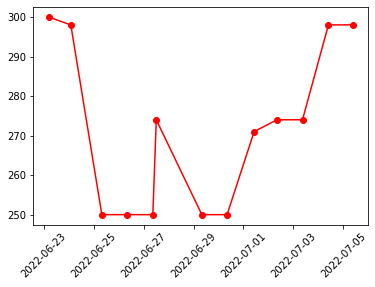

In [21]:


plt.plot(new_df['time_stamp'],new_df['total_cost'],"-or")


plt.xticks(rotation = 45)
plt.show()

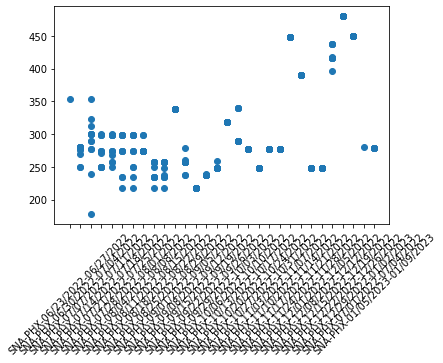

In [24]:
plt.scatter(new_df_2["trip_id"],new_df_2["total_cost"])
plt.xticks(rotation = 45)
plt.show()

In [15]:
new_df.loc[new_df["trip_id"]="SNA-PHX-07/17/2022-07/18/2022"]

SyntaxError: invalid syntax (Temp/ipykernel_18812/181298076.py, line 1)